In [9]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [ ]:
def plotPolygon(ax, polygon, color, linewidth=2):
    for i in range(1, len(polygon)):
        ax.plot([polygon[i - 1][0], polygon[i][0]],
                [polygon[i - 1][1], polygon[i][1]],
                color=color, linewidth=linewidth,
               transform = ccrs.Geodetic())

def plotGrid(roi, gridded_data, closest_viirs):
    fig, axes = plt.subplots(ncols=2, nrows=1, subplot_kw={'projection': ccrs.PlateCarree()})
    viirs_data = getVIIRSData("data/VIIRS-20200320/", closest_viirs)
    
    metadata = None
    with open("data/VIIRS-20200320/metadata", "rb") as md_file:
            metadata = pickle.load(md_file)
    [lon_grid, lat_grid] = getGrid(roi[1])
    
    fig.set_size_inches(22, 16)

    for ax in axes:
        ax.stock_img()

        ax.set_xlim([lon_grid.min() - 5, lon_grid.max() + 5])
        ax.set_ylim([lat_grid.min() - 5, lat_grid.max() + 5])
    
        plotPolygon(ax, roi[0], "green", linewidth=5)
        plotPolygon(ax, metadata[closest_viirs]["bounds"], "red", linewidth=5)


    test = viirs_data.AOD550.fillna(0)
    vmax = test.values.max()
    vmin = test.values.min()
    
    lons = ma.masked_invalid(viirs_data.Longitude.values)
    lats = ma.masked_invalid(viirs_data.Latitude.values)
    viirs_mask = ma.masked_invalid(viirs_data.AOD550.values)
    
    axes[0].pcolormesh(lon_grid, lat_grid, gridded_data, transform=ccrs.PlateCarree(), vmax=vmax, vmin=vmin)
    axes[1].pcolormesh(lons, lats, viirs_mask,transform=ccrs.PlateCarree(), vmax=vmax, vmin=vmin)

    plt.show()

0.07552293


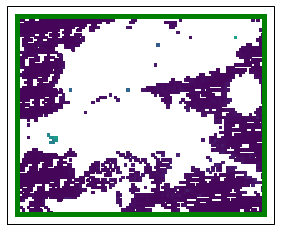

0.09054663


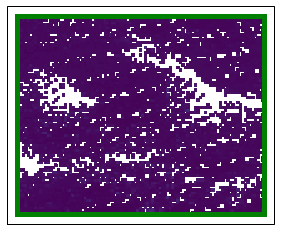

0.08969214


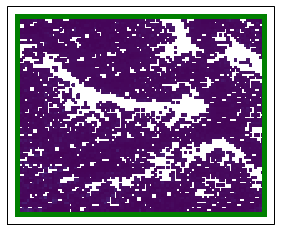

0.092978984


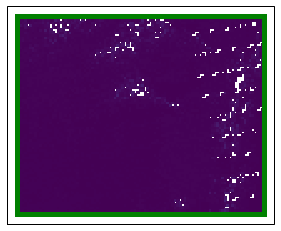

0.08694066


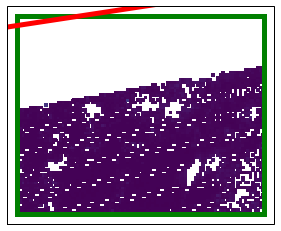

0.06659033


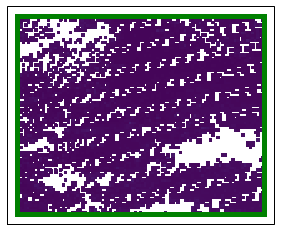

0.11620702


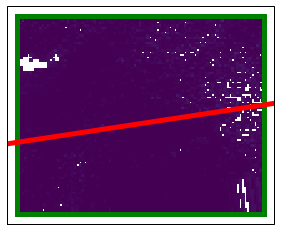

0.08062842


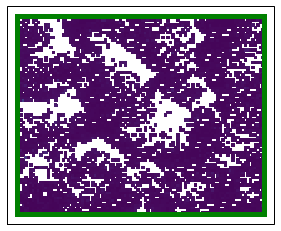

0.095795654


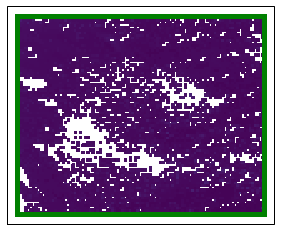

0.10009863


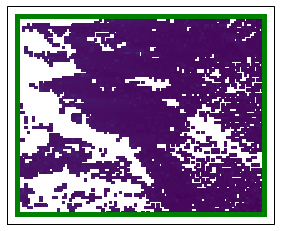

0.10436204


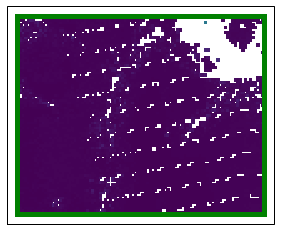

0.044410262


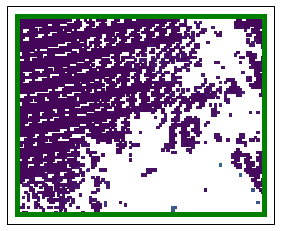

0.08025731


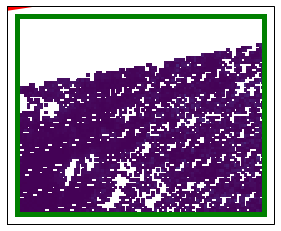

0.065105334


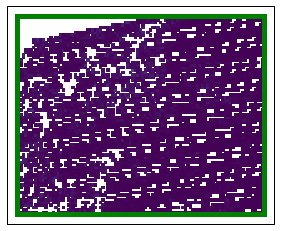

0.1385764


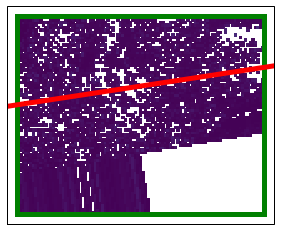

0.10531714


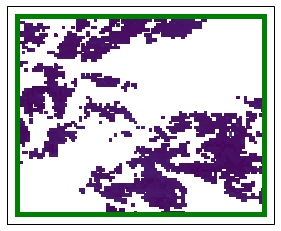

0.07857469


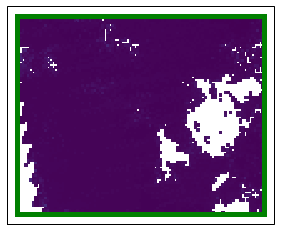

0.07073167


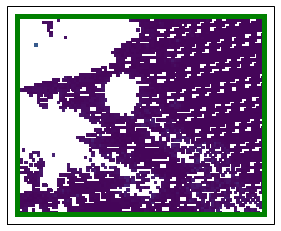

0.07262792


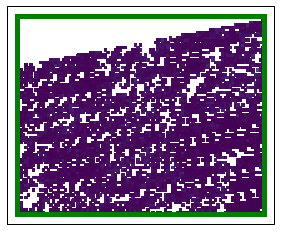

0.07494725


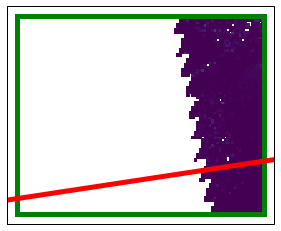

0.10863866


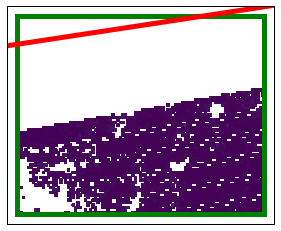

0.10205176


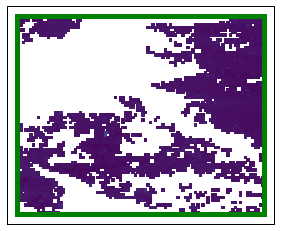

0.18200143


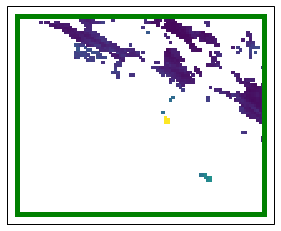

0.090175524


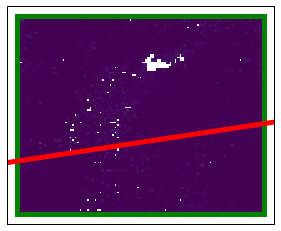

0.057186026


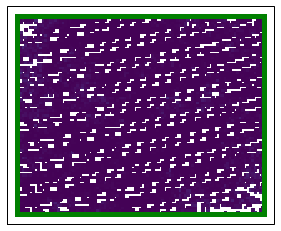

0.10045579


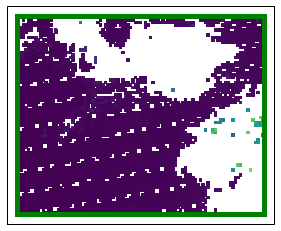

0.06392004


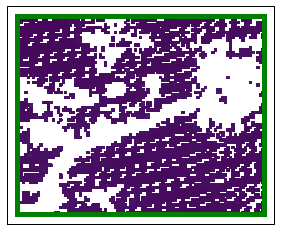

0.08040574


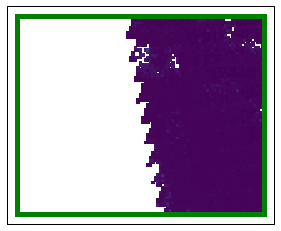

0.086295635


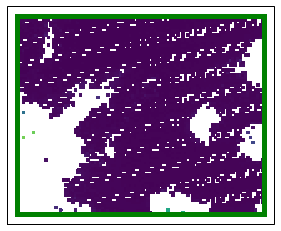

0.06407263


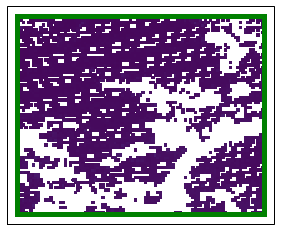

0.12856664


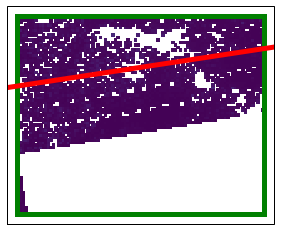

0.14470895


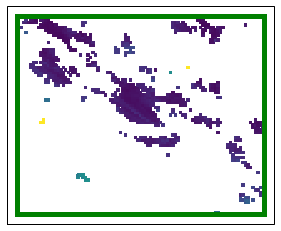

0.06889492


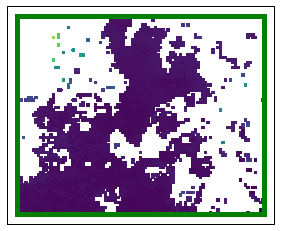

0.078605205


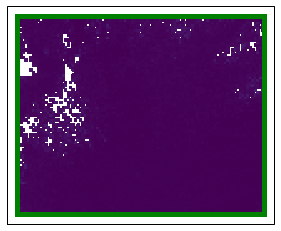

0.14510716


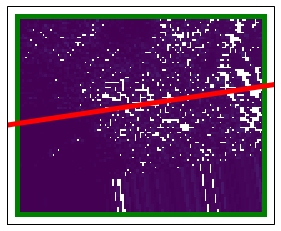

0.07557827


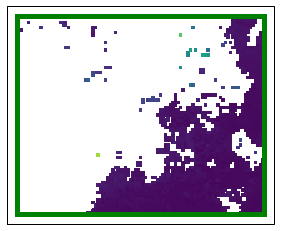

0.08199681


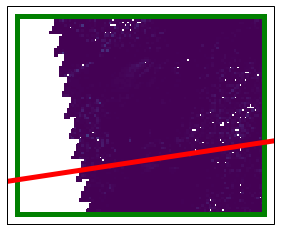

0.09462693


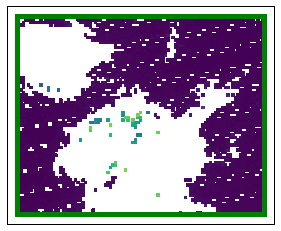

0.071839355


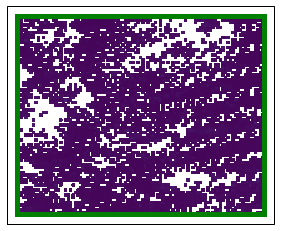

0.19494088


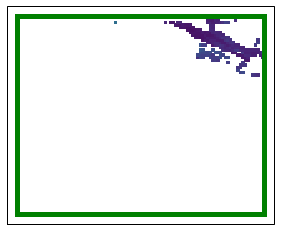

0.07061865


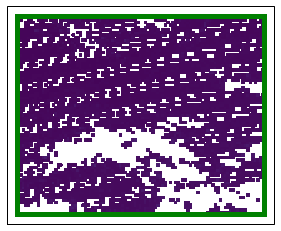

0.06274563


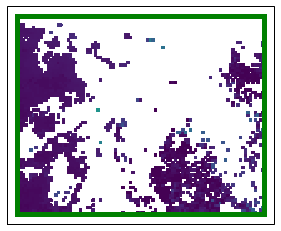

0.19182809


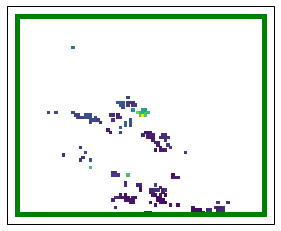

0.05158605


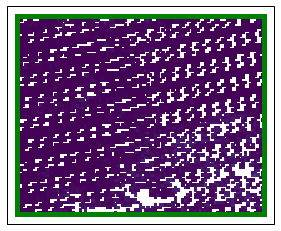

0.058845077


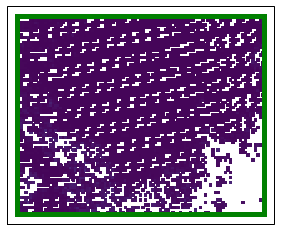

0.07970384


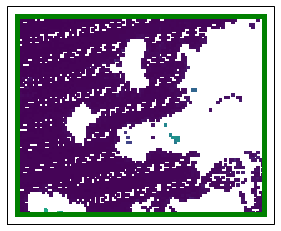

0.07491258


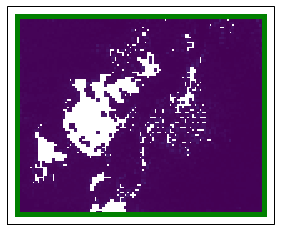

In [30]:
def plotPolygon(ax, polygon, color, linewidth=2):
    for i in range(1, len(polygon)):
        ax.plot([polygon[i - 1][0], polygon[i][0]],
                [polygon[i - 1][1], polygon[i][1]],
                color=color, linewidth=linewidth,
               transform = ccrs.Geodetic())

def plotData(plot_dict, metadata):
    fig, axes = plt.subplots(ncols=1, nrows=1, subplot_kw={'projection': ccrs.PlateCarree()})
    
    boundary = plot_dict["roi"][1]
    
    numLonPoints = 100j
    numLatPoints = 80j
    lon_grid, lat_grid = np.mgrid[boundary["minLon"]:boundary["maxLon"]:numLonPoints, 
                                  boundary["minLat"]:boundary["maxLat"]:numLatPoints]
    
    
    plotPolygon(axes, plot_dict["roi"][0], "green", linewidth=5)
    plotPolygon(axes, metadata[plot_dict["closest_viirs"]]["bounds"], "red", linewidth=5)
    
    axes.pcolormesh(lon_grid, lat_grid, plot_dict["gridded_viirs"], transform=ccrs.PlateCarree(), vmax=5.0, vmin=0)
    
    axes.set_xlim([lon_grid.min() - 0.05, lon_grid.max() + 0.05])
    axes.set_ylim([lat_grid.min() - 0.05, lat_grid.max() + 0.05])
    
    plt.show()
    
    
    

folder = "data/VIIRS-20200320/"
metadata = None
with open(folder + "metadata", "rb") as md_file:
    metadata = pickle.load(md_file)
    
for file in os.listdir(folder + "processed/"):
    plot_dict = None
    with open(folder + "processed/" + file, "rb") as datafile:
        plot_dict = pickle.load(datafile)
    print(plot_dict["merra_val"])
    plotData(plot_dict, metadata)
        